In [ ]:
import math
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn import datasets
import numpy as np
import seaborn as sbr
from scipy import linalg
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)
iris = datasets.load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)


In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
df['Iris type'] = iris['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
mask = (df['Iris type'] == 1) | (df['Iris type'] == 2)
df[mask][['sepal length (cm)', 'sepal width (cm)']]

,sepal length (cm),sepal width (cm)
50,7.0,3.2
51,6.4,3.2
52,6.9,3.1
53,5.5,2.3
54,6.5,2.8
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [ ]:
df[df['Iris type'].isin([1, 2])][['sepal length (cm)', 'sepal width (cm)']]

,sepal length (cm),sepal width (cm)
50,7.0,3.2
51,6.4,3.2
52,6.9,3.1
53,5.5,2.3
54,6.5,2.8
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [ ]:
#PART I

In [ ]:
#df.iloc[:,:4].corr()
m1 = df[df["Iris type"] == 0].iloc[:,:4].corr()
m2 = df[df["Iris type"] == 1].iloc[:,:4].corr()
m3 = df[df["Iris type"] == 2].iloc[:,:4].corr()
print(m1, "\n", m2, "\n", m3)

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000          0.742547           0.267176   
sepal width (cm)            0.742547          1.000000           0.177700   
petal length (cm)           0.267176          0.177700           1.000000   
petal width (cm)            0.278098          0.232752           0.331630   

                   petal width (cm)  
sepal length (cm)          0.278098  
sepal width (cm)           0.232752  
petal length (cm)          0.331630  
petal width (cm)           1.000000   
                    sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000          0.525911           0.754049   
sepal width (cm)            0.525911          1.000000           0.560522   
petal length (cm)           0.754049          0.560522           1.000000   
petal width (cm)            0.546461          0.663999           0.786668   

                   petal width (cm) 

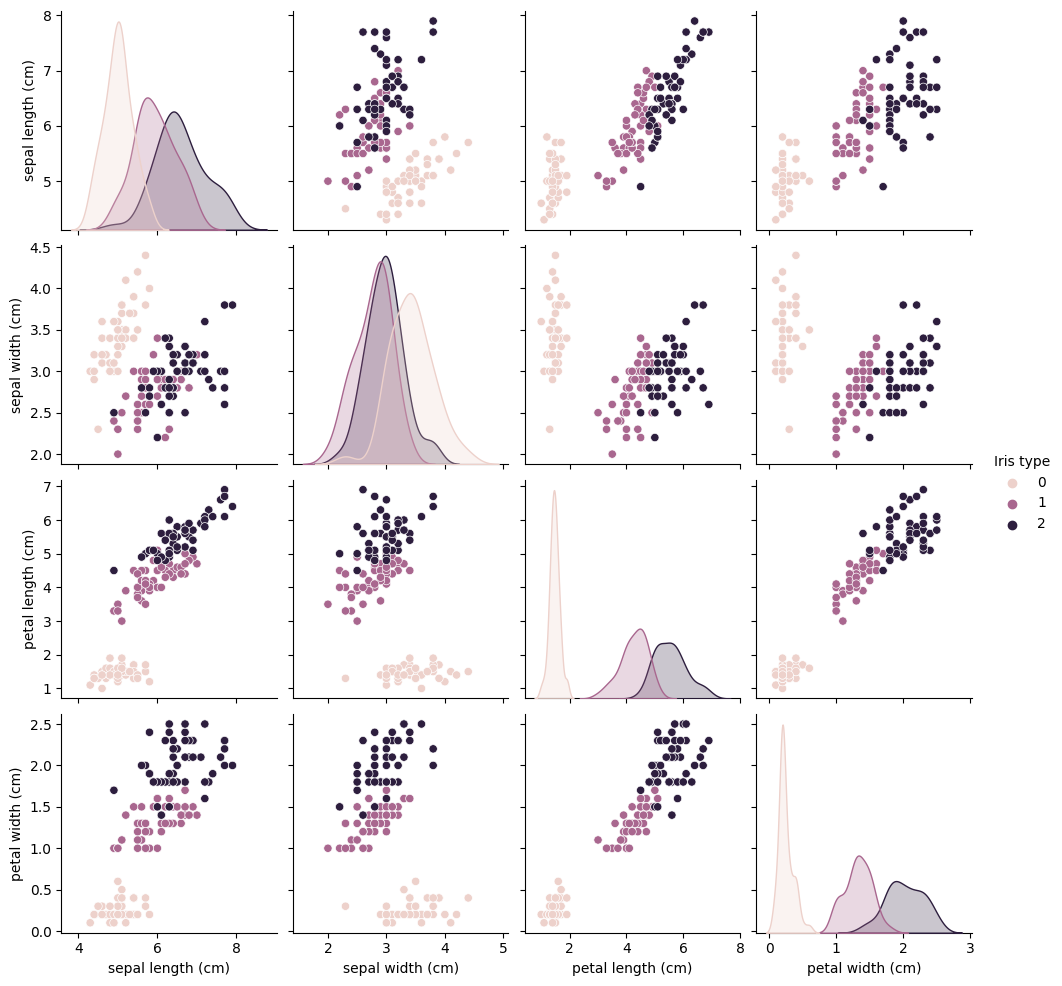

In [ ]:
sbr.pairplot(df, hue = 'Iris type', vars = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])

In [ ]:
# PART II

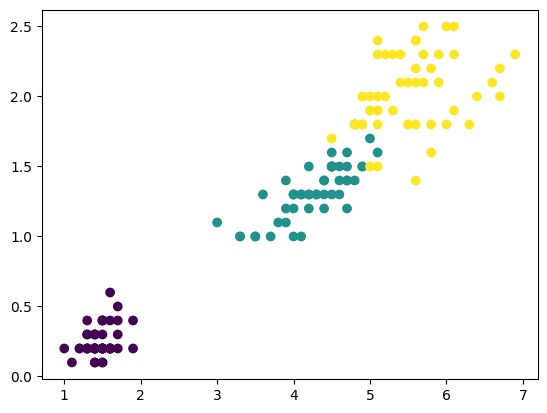

6

In [ ]:
#petal length - petal width
#fig, ax = plt.subplots()

#plt.scatter(df[df["Iris type"] == 0].iloc[:,2], df[df["Iris type"] == 0].iloc[:,3], marker=".", color = "orange")
#plt.scatter(df[df["Iris type"] == 1].iloc[:,2],df[df["Iris type"] == 1].iloc[:,3], marker=".", color = "blue")
#plt.scatter(df[df["Iris type"] == 2].iloc[:,2],df[df["Iris type"] == 2].iloc[:,3], marker=".", color = "green")
#plt.title("")
#plt.xlabel("petal length")
#plt.ylabel("petal width")
#ax.plot(df.iloc[:,2],df.iloc[:,3])
#ax.set_xlabel("petal length")
#ax.set_ylabel("petal width")
plt.figure()

X = df[['petal length (cm)', 'petal width (cm)']]
y = df["Iris type"]
lda = LinearDiscriminantAnalysis()

y_pred = lda.fit(X, y)
plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c=y)
plt.show()
(y_pred.predict(X) != y).sum()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


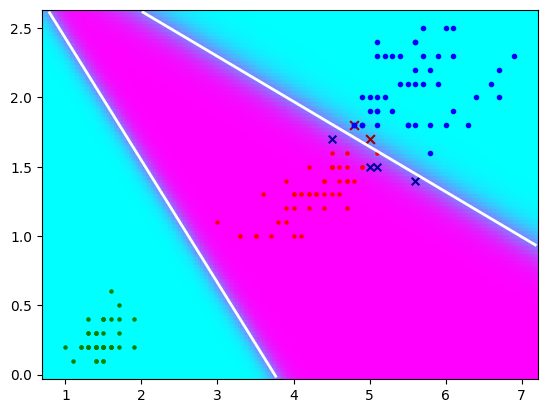

6

In [ ]:
#Linear discriminant
plt.figure()
lda = LinearDiscriminantAnalysis()
y_pred = lda.fit(X, y)
#plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c=y)
tp = y == y_pred.predict(X)  # True Positive
tp0, tp1, tp2 = tp[y == 0], tp[y == 1], tp[y == 2]
X0, X1, X2 = X[y == 0], X[y == 1], X[y == 2]
X0_tp, X0_fp = X0[tp0], X0[~tp0]
X1_tp, X1_fp = X1[tp1], X1[~tp1]
X2_tp, X2_fp = X2[tp2], X2[~tp2]
#type0
plt.scatter(X0_tp['petal length (cm)'], X0_tp['petal width (cm)'],  marker=".", s=20, color="green")
plt.scatter(X0_fp['petal length (cm)'], X0_fp['petal width (cm)'],  marker="x", s=40, color="#006400")
#type1
plt.scatter(X1_tp['petal length (cm)'], X1_tp['petal width (cm)'],  marker=".", s=20, color="red")
plt.scatter(X1_fp['petal length (cm)'], X1_fp['petal width (cm)'],  marker="x", s=40, color="#990000")
#type2
plt.scatter(X2_tp['petal length (cm)'], X2_tp['petal width (cm)'],  marker=".", color="blue")
plt.scatter(X2_fp['petal length (cm)'], X2_fp['petal width (cm)'],  marker="x", s=30, color="#000099")
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap = 'cool', norm=colors.Normalize(0.0, 1.0), zorder=0)
plt.contour(xx, yy, Z, [0.5], linewidths=2.0, colors="white")
plt.show()
(y_pred.predict(X) != y).sum()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


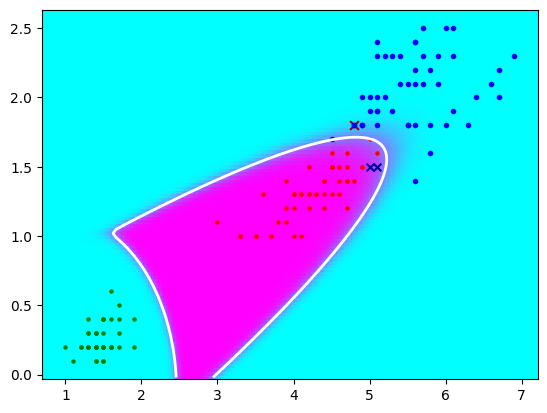

3

In [ ]:
#Quadratic Discriminant
plt.figure()
qda = QuadraticDiscriminantAnalysis()
y_pred = qda.fit(X, y)
#plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c=y)
tp = y == y_pred.predict(X)  # True Positive
tp0, tp1, tp2 = tp[y == 0], tp[y == 1], tp[y == 2]
X0, X1, X2 = X[y == 0], X[y == 1], X[y == 2]
X0_tp, X0_fp = X0[tp0], X0[~tp0]
X1_tp, X1_fp = X1[tp1], X1[~tp1]
X2_tp, X2_fp = X2[tp2], X2[~tp2]
#type0
plt.scatter(X0_tp['petal length (cm)'], X0_tp['petal width (cm)'],  marker=".", s=20, color="green")
plt.scatter(X0_fp['petal length (cm)'], X0_fp['petal width (cm)'],  marker="x", s=40, color="#006400")
#type1
plt.scatter(X1_tp['petal length (cm)'], X1_tp['petal width (cm)'],  marker=".", s=20, color="red")
plt.scatter(X1_fp['petal length (cm)'], X1_fp['petal width (cm)'],  marker="x", s=40, color="#990000")
#type2
plt.scatter(X2_tp['petal length (cm)'], X2_tp['petal width (cm)'],  marker=".", color="blue")
plt.scatter(X2_fp['petal length (cm)'], X2_fp['petal width (cm)'],  marker="x", s=30, color="#000099")

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
Z = qda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='cool', norm=colors.Normalize(0.0, 1.0), zorder=0)
plt.contour(xx, yy, Z, [0.5], linewidths=2.0, colors="white")
plt.show()
(y_pred.predict(X) != y).sum()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


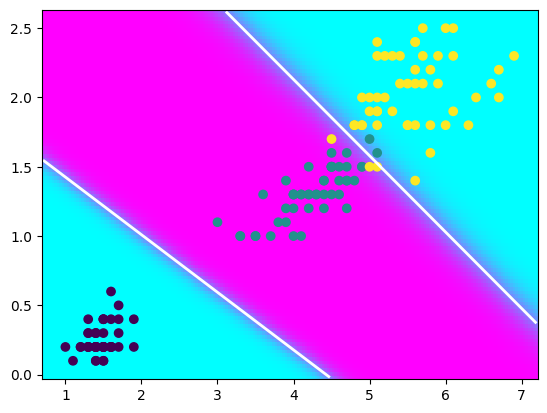

3

In [ ]:
#Logistic regression 1
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5)
logreg.fit(X, y)
plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c=y)
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
Z = logreg.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='cool', norm=colors.Normalize(0.0, 1.0), zorder=0)
plt.contour(xx, yy, Z, [0.5], linewidths=2.0, colors="white")
plt.show()
(y_pred.predict(X) != y).sum()

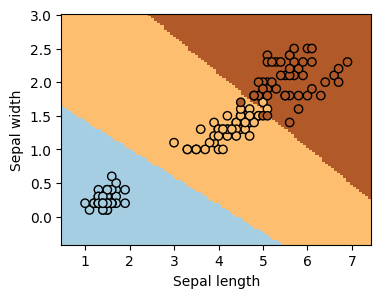

In [ ]:
#Logistic regression 2
from sklearn.inspection import DecisionBoundaryDisplay
_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    logreg,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)
plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c=y, edgecolors="k", cmap=plt.cm.Paired)
plt.show()


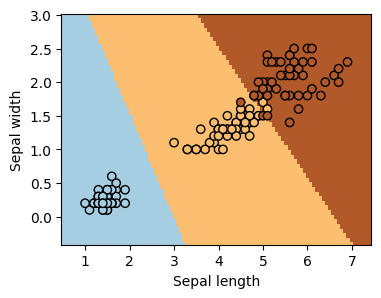

In [ ]:
#SVM linear
from sklearn import svm
C = 1.0
svm_lin = svm.SVC(kernel = 'linear', C = C)
svm_lin.fit(X, y)
_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    svm_lin,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)
plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c=y, edgecolors="k", cmap=plt.cm.Paired)
plt.show()

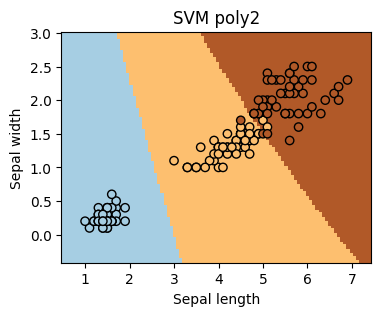

In [ ]:
#SVM poly 2
from sklearn import svm
C = 1.0
svm_qu = svm.SVC(kernel = 'poly', degree = 2, C = C)
svm_qu.fit(X, y)
_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    svm_qu,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)
plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c=y, edgecolors="k", cmap=plt.cm.Paired)
plt.title("SVM poly2")
plt.show()

In [ ]:
# PART III

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


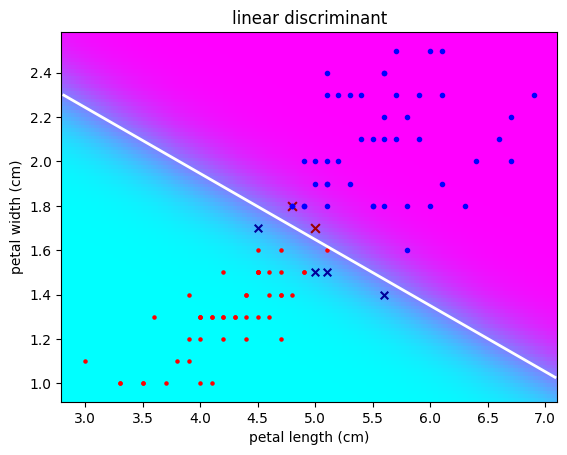

6

In [ ]:
mask = (df['Iris type'] == 1) | (df['Iris type'] == 2)
y = df[mask]['Iris type'].values
X = df[mask][['petal length (cm)', 'petal width (cm)']]

plt.figure()
lda = LinearDiscriminantAnalysis()
y_pred = lda.fit(X, y)
#plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c=y)
tp = y == y_pred.predict(X)  # True Positive
tp0, tp1, tp2 = tp[y == 0], tp[y == 1], tp[y == 2]
X0, X1, X2 = X[y == 0], X[y == 1], X[y == 2]
X0_tp, X0_fp = X0[tp0], X0[~tp0]
X1_tp, X1_fp = X1[tp1], X1[~tp1]
X2_tp, X2_fp = X2[tp2], X2[~tp2]
#type0
plt.scatter(X0_tp['petal length (cm)'], X0_tp['petal width (cm)'],  marker=".", s=20, color="green")
plt.scatter(X0_fp['petal length (cm)'], X0_fp['petal width (cm)'],  marker="x", s=40, color="#006400")
#type1
plt.scatter(X1_tp['petal length (cm)'], X1_tp['petal width (cm)'],  marker=".", s=20, color="red")
plt.scatter(X1_fp['petal length (cm)'], X1_fp['petal width (cm)'],  marker="x", s=40, color="#990000")
#type2
plt.scatter(X2_tp['petal length (cm)'], X2_tp['petal width (cm)'],  marker=".", color="blue")
plt.scatter(X2_fp['petal length (cm)'], X2_fp['petal width (cm)'],  marker="x", s=30, color="#000099")
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap = 'cool', norm=colors.Normalize(0.0, 1.0), zorder=0)
plt.contour(xx, yy, Z, [0.5], linewidths=2.0, colors="white")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.title("linear discriminant")
plt.show()
(y_pred.predict(X) != y).sum()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


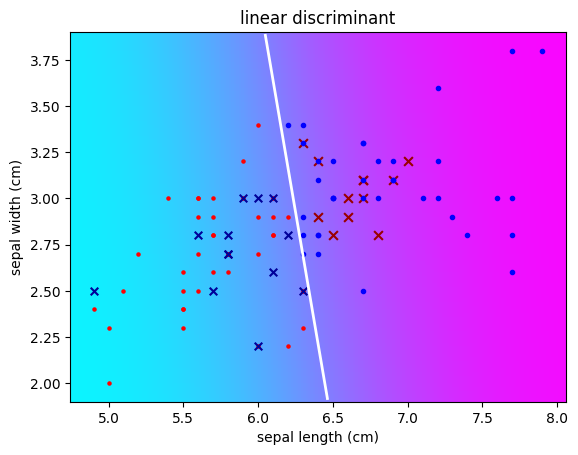

25

In [ ]:
mask = (df['Iris type'] == 1) | (df['Iris type'] == 2)
y = df[mask]['Iris type'].values
X = df[mask][['sepal length (cm)', 'sepal width (cm)']]

plt.figure()
lda = LinearDiscriminantAnalysis()
y_pred = lda.fit(X, y)
#plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c=y)
tp = y == y_pred.predict(X)  # True Positive
tp0, tp1, tp2 = tp[y == 0], tp[y == 1], tp[y == 2]
X0, X1, X2 = X[y == 0], X[y == 1], X[y == 2]
X0_tp, X0_fp = X0[tp0], X0[~tp0]
X1_tp, X1_fp = X1[tp1], X1[~tp1]
X2_tp, X2_fp = X2[tp2], X2[~tp2]
#type0
plt.scatter(X0_tp['sepal length (cm)'], X0_tp['sepal width (cm)'],  marker=".", s=20, color="green")
plt.scatter(X0_fp['sepal length (cm)'], X0_fp['sepal width (cm)'],  marker="x", s=40, color="#006400")
#type1
plt.scatter(X1_tp['sepal length (cm)'], X1_tp['sepal width (cm)'],  marker=".", s=20, color="red")
plt.scatter(X1_fp['sepal length (cm)'], X1_fp['sepal width (cm)'],  marker="x", s=40, color="#990000")
#type2
plt.scatter(X2_tp['sepal length (cm)'], X2_tp['sepal width (cm)'],  marker=".", color="blue")
plt.scatter(X2_fp['sepal length (cm)'], X2_fp['sepal width (cm)'],  marker="x", s=30, color="#000099")
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap = 'cool', norm=colors.Normalize(0.0, 1.0), zorder=0)
plt.contour(xx, yy, Z, [0.5], linewidths=2.0, colors="white")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.title("linear discriminant")
plt.show()
(y_pred.predict(X) != y).sum()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


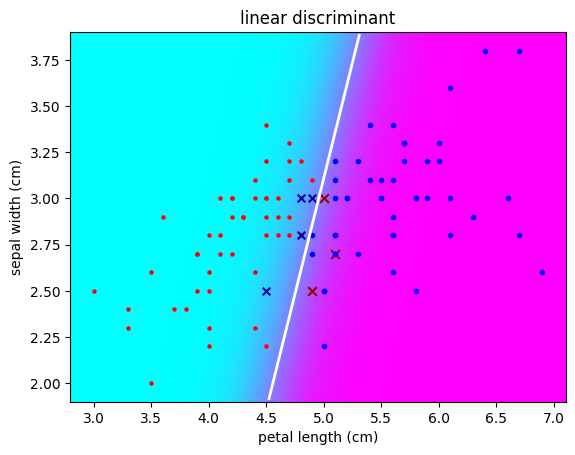

7

In [ ]:
mask = (df['Iris type'] == 1) | (df['Iris type'] == 2)
y = df[mask]['Iris type'].values
X = df[mask][['petal length (cm)', 'sepal width (cm)']]
plt.figure()
lda = LinearDiscriminantAnalysis()
y_pred = lda.fit(X, y)
#plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c=y)
tp = y == y_pred.predict(X)  # True Positive
tp0, tp1, tp2 = tp[y == 0], tp[y == 1], tp[y == 2]
X0, X1, X2 = X[y == 0], X[y == 1], X[y == 2]
X0_tp, X0_fp = X0[tp0], X0[~tp0]
X1_tp, X1_fp = X1[tp1], X1[~tp1]
X2_tp, X2_fp = X2[tp2], X2[~tp2]
#type0
plt.scatter(X0_tp['petal length (cm)'], X0_tp['sepal width (cm)'],  marker=".", s=20, color="green")
plt.scatter(X0_fp['petal length (cm)'], X0_fp['sepal width (cm)'],  marker="x", s=40, color="#006400")
#type1
plt.scatter(X1_tp['petal length (cm)'], X1_tp['sepal width (cm)'],  marker=".", s=20, color="red")
plt.scatter(X1_fp['petal length (cm)'], X1_fp['sepal width (cm)'],  marker="x", s=40, color="#990000")
#type2
plt.scatter(X2_tp['petal length (cm)'], X2_tp['sepal width (cm)'],  marker=".", color="blue")
plt.scatter(X2_fp['petal length (cm)'], X2_fp['sepal width (cm)'],  marker="x", s=30, color="#000099")
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap = 'cool', norm=colors.Normalize(0.0, 1.0), zorder=0)
plt.contour(xx, yy, Z, [0.5], linewidths=2.0, colors="white")
plt.xlabel("petal length (cm)")
plt.ylabel("sepal width (cm)")
plt.title("linear discriminant")
plt.show()
(y_pred.predict(X) != y).sum()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


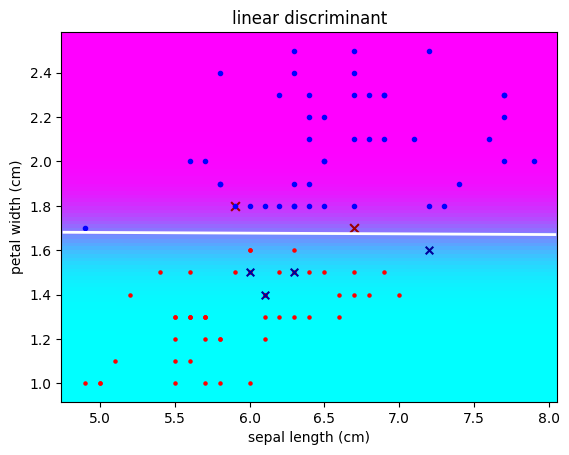

6

In [ ]:
mask = (df['Iris type'] == 1) | (df['Iris type'] == 2)
y = df[mask]['Iris type'].values
X = df[mask][['sepal length (cm)', 'petal width (cm)']]

plt.figure()
lda = LinearDiscriminantAnalysis()
y_pred = lda.fit(X, y)
#plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c=y)
tp = y == y_pred.predict(X)  # True Positive
tp0, tp1, tp2 = tp[y == 0], tp[y == 1], tp[y == 2]
X0, X1, X2 = X[y == 0], X[y == 1], X[y == 2]
X0_tp, X0_fp = X0[tp0], X0[~tp0]
X1_tp, X1_fp = X1[tp1], X1[~tp1]
X2_tp, X2_fp = X2[tp2], X2[~tp2]
#type0
plt.scatter(X0_tp['sepal length (cm)'], X0_tp['petal width (cm)'],  marker=".", s=20, color="green")
plt.scatter(X0_fp['sepal length (cm)'], X0_fp['petal width (cm)'],  marker="x", s=40, color="#006400")
#type1
plt.scatter(X1_tp['sepal length (cm)'], X1_tp['petal width (cm)'],  marker=".", s=20, color="red")
plt.scatter(X1_fp['sepal length (cm)'], X1_fp['petal width (cm)'],  marker="x", s=40, color="#990000")
#type2
plt.scatter(X2_tp['sepal length (cm)'], X2_tp['petal width (cm)'],  marker=".", color="blue")
plt.scatter(X2_fp['sepal length (cm)'], X2_fp['petal width (cm)'],  marker="x", s=30, color="#000099")
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap = 'cool', norm=colors.Normalize(0.0, 1.0), zorder=0)
plt.contour(xx, yy, Z, [0.5], linewidths=2.0, colors="white")
plt.xlabel("sepal length (cm)")
plt.ylabel("petal width (cm)")
plt.title("linear discriminant")
plt.show()
(y_pred.predict(X) != y).sum()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


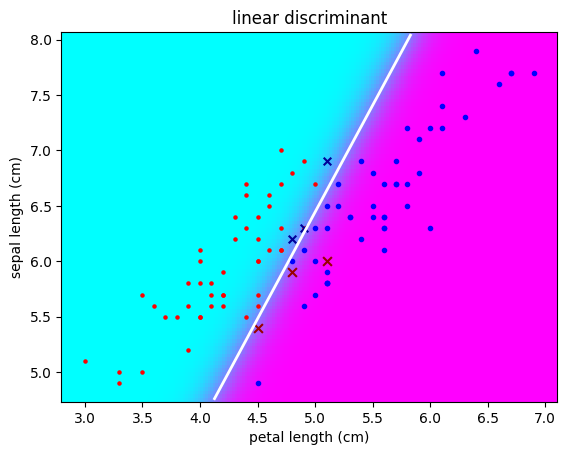

6

In [ ]:
mask = (df['Iris type'] == 1) | (df['Iris type'] == 2)
y = df[mask]['Iris type'].values
X = df[mask][['petal length (cm)', 'sepal length (cm)']]

plt.figure()
lda = LinearDiscriminantAnalysis()
y_pred = lda.fit(X, y)
#plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c=y)
tp = y == y_pred.predict(X)  # True Positive
tp0, tp1, tp2 = tp[y == 0], tp[y == 1], tp[y == 2]
X0, X1, X2 = X[y == 0], X[y == 1], X[y == 2]
X0_tp, X0_fp = X0[tp0], X0[~tp0]
X1_tp, X1_fp = X1[tp1], X1[~tp1]
X2_tp, X2_fp = X2[tp2], X2[~tp2]
#type0
plt.scatter(X0_tp['petal length (cm)'], X0_tp['sepal length (cm)'],  marker=".", s=20, color="green")
plt.scatter(X0_fp['petal length (cm)'], X0_fp['sepal length (cm)'],  marker="x", s=40, color="#006400")
#type1
plt.scatter(X1_tp['petal length (cm)'], X1_tp['sepal length (cm)'],  marker=".", s=20, color="red")
plt.scatter(X1_fp['petal length (cm)'], X1_fp['sepal length (cm)'],  marker="x", s=40, color="#990000")
#type2
plt.scatter(X2_tp['petal length (cm)'], X2_tp['sepal length (cm)'],  marker=".", color="blue")
plt.scatter(X2_fp['petal length (cm)'], X2_fp['sepal length (cm)'],  marker="x", s=30, color="#000099")
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap = 'cool', norm=colors.Normalize(0.0, 1.0), zorder=0)
plt.contour(xx, yy, Z, [0.5], linewidths=2.0, colors="white")
plt.xlabel("petal length (cm)")
plt.ylabel("sepal length (cm)")
plt.title("linear discriminant")
plt.show()
(y_pred.predict(X) != y).sum()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


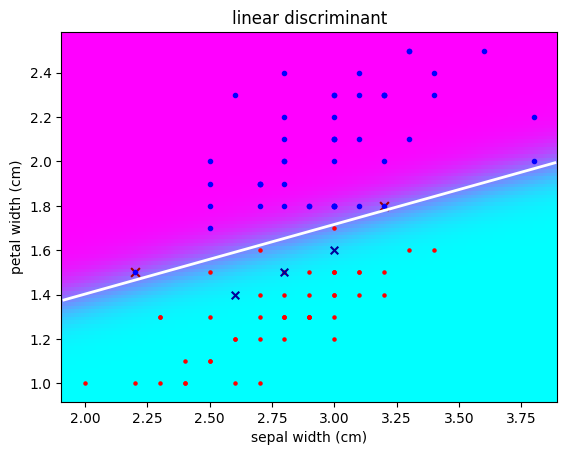

0.95


In [ ]:
mask = (df['Iris type'] == 1) | (df['Iris type'] == 2)
y = df[mask]['Iris type'].values
X = df[mask][['sepal width (cm)', 'petal width (cm)']]

plt.figure()
lda = LinearDiscriminantAnalysis()
y_pred = lda.fit(X, y)
#plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c=y)
tp = y == y_pred.predict(X)  # True Positive
tp0, tp1, tp2 = tp[y == 0], tp[y == 1], tp[y == 2]
X0, X1, X2 = X[y == 0], X[y == 1], X[y == 2]
X0_tp, X0_fp = X0[tp0], X0[~tp0]
X1_tp, X1_fp = X1[tp1], X1[~tp1]
X2_tp, X2_fp = X2[tp2], X2[~tp2]
#type0
plt.scatter(X0_tp['sepal width (cm)'], X0_tp['petal width (cm)'],  marker=".", s=20, color="green")
plt.scatter(X0_fp['sepal width (cm)'], X0_fp['petal width (cm)'],  marker="x", s=40, color="#006400")
#type1
plt.scatter(X1_tp['sepal width (cm)'], X1_tp['petal width (cm)'],  marker=".", s=20, color="red")
plt.scatter(X1_fp['sepal width (cm)'], X1_fp['petal width (cm)'],  marker="x", s=40, color="#990000")
#type2
plt.scatter(X2_tp['sepal width (cm)'], X2_tp['petal width (cm)'],  marker=".", color="blue")
plt.scatter(X2_fp['sepal width (cm)'], X2_fp['petal width (cm)'],  marker="x", s=30, color="#000099")
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap = 'cool', norm=colors.Normalize(0.0, 1.0), zorder=0)
plt.contour(xx, yy, Z, [0.5], linewidths=2.0, colors="white")
plt.xlabel("sepal width (cm)")
plt.ylabel("petal width (cm)")
plt.title("linear discriminant")
plt.show()
(y_pred.predict(X) != y).sum()

In [ ]:
# PART IV

In [ ]:
Sigma = df[df["Iris type"] == 1].iloc[:,2:4].cov().values
Lambda = df[df["Iris type"] == 2].iloc[:,2:4].cov().values
print(Sigma, "\n", Lambda)
SIGMA_list = [Sigma, Lambda]
print(SIGMA_list)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]] 
 [[0.30458776 0.04882449]
 [0.04882449 0.07543265]]
[array([[0.22081633, 0.07310204],
       [0.07310204, 0.03910612]]), array([[0.30458776, 0.04882449],
       [0.04882449, 0.07543265]])]


In [ ]:
mask = (df['Iris type'] == 1) | (df['Iris type'] == 2)
X = df[mask][['petal length (cm)', 'petal width (cm)']]
y = df[mask]['Iris type']
X1, X2 = X[y == 1], X[y == 2]


In [ ]:
m1, m2 = df[df["Iris type"] == 1].iloc[:,2:4].mean()
m = np.array([m1, m2])
v1, v2 = df[df["Iris type"] == 2].iloc[:,2:4].mean()
v = np.array([v1, v2])
MU_list = np.array([[m1, m2], [v1, v2]])
print(MU_list)

[[4.26  1.326]
 [5.552 2.026]]


In [ ]:
pi_list = y.value_counts().values / len(y)

print(pi_list)


[0.5 0.5]


In [ ]:
def Q(x, m, Sigma):
  return np.dot(np.dot((x - m).T, linalg.inv(Sigma)), x - m)

def QDA_l(x, m, Sigma, p):
  return (- 0.5*Q(x, m, Sigma) - math.log(math.sqrt(linalg.det(Sigma))) + math.log(p)).flatten()[0]

def QDA_class(X,MU_list,SIGMA_list,pi_list):
  scores_list = []
  classes = len(MU_list)

  for p in range(classes):
      score = QDA_l(X, MU_list[p], SIGMA_list[p], pi_list[p])
      scores_list.append(score)

  return np.argmax(scores_list)

N = 100
x1 = np.linspace(2.8, 7, N)
x2 = np.linspace(0.8, 2.7, N)
x1, x2 = np.meshgrid(x1, x2)
zz = np.array(  [QDA_class( np.array([xx,yy]), MU_list, SIGMA_list, pi_list)
                     for xx, yy in zip(np.ravel(x1), np.ravel(x2)) ] )
Z = zz.reshape(x1.shape)

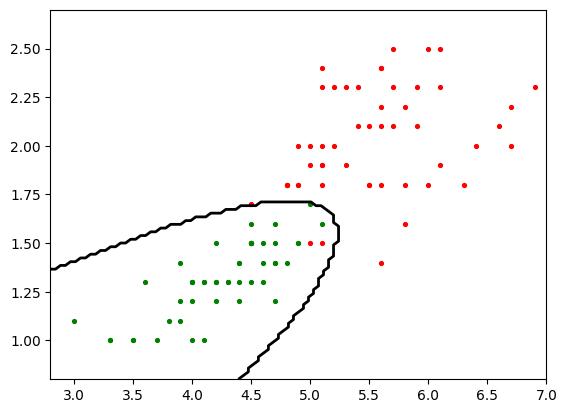

In [ ]:
plt.figure()
plt.scatter(X1['petal length (cm)'], X1['petal width (cm)'],  marker=".", s=30, color="green")
plt.scatter(X2['petal length (cm)'], X2['petal width (cm)'],  marker=".", s=30, color="red")
plt.contour(x1, x2, Z, [0.5], linewidths=2.0, colors = "black")
plt.show()